# Credit Card Fraud Detection
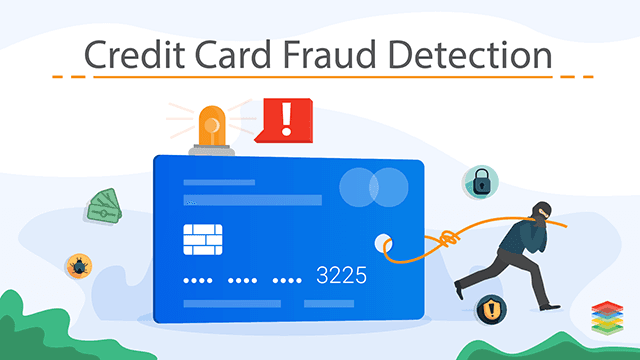

Dataset: [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)


Keterangan Dataset :
Dataset ini berisi transaksi yang dilakukan oleh kartu kredit pada bulan September 2013 oleh pemegang kartu di Eropa. Dataset ini menampilkan transaksi yang terjadi dalam dua hari, di mana ada 492 penipuan dari 284.807 transaksi. Dataset ini sangat tidak seimbang, kelas positif (penipuan) hanya 0,172% dari semua transaksi.
Dataset ini hanya berisi variabel input numerik yang merupakan hasil dari transformasi PCA. Karena masalah kerahasiaan, tidak terdapat fitur asli dan informasi latar belakang lebih lanjut tentang data. Fitur V1, V2, … V28 adalah komponen utama yang diperoleh dengan PCA, fitur yang tidak ditransformasikan dengan PCA hanya ‘Time’ dan ‘Amount’. Fitur ‘Time’ berisi detik yang berlalu antara setiap transaksi dan transaksi pertama dalam dataset. Fitur ‘Amount’ adalah jumlah transaksi, fitur ini dapat digunakan untuk pembelajaran sensitif biaya yang bergantung pada contoh. Fitur ‘Class’ adalah variabel respons dan mengambil nilai 1 dalam kasus penipuan dan 0 sebaliknya.


# Import Data and Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Algoritma
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

#filter warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/content/drive/MyDrive/dataset/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Explanatory Data Analysis

In [7]:
non_fraud = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud) * 100)
print("Jumlah Transaksi Asli: ", non_fraud)
print("Jumlah Transaksi Fraud:", fraud)
print("Persentasi Transaksi Fraud: {:.4f} ".format(fraud_percent))

Jumlah Transaksi Asli:  284315
Jumlah Transaksi Fraud: 492
Persentasi Transaksi Fraud: 0.1727 


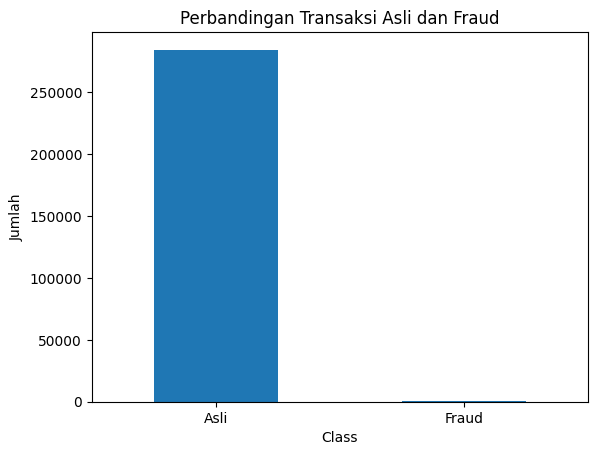

In [8]:
labels = ["Asli", "Fraud"]
count_classes = data.value_counts(data['Class'], sort=True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Perbandingan Transaksi Asli dan Fraud")
plt.ylabel("Jumlah")
plt.xticks(range(2), labels)
plt.show()

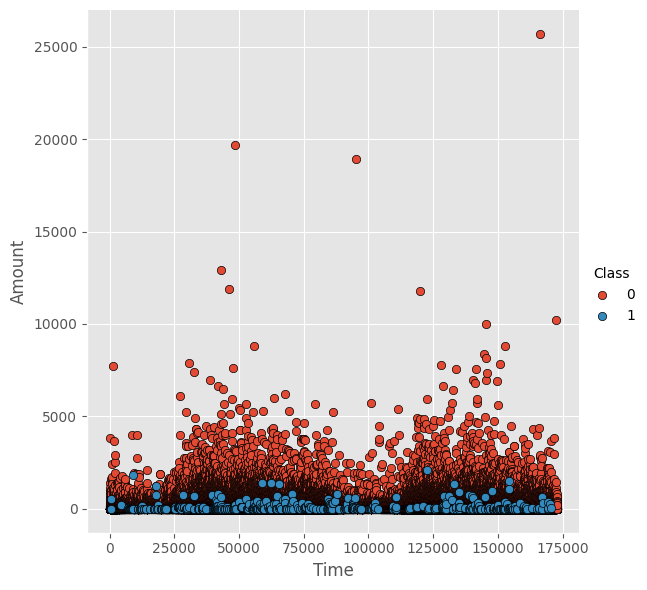

In [9]:
plt.style.use("ggplot")
sns.FacetGrid(data, hue="Class", height=6).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.show()

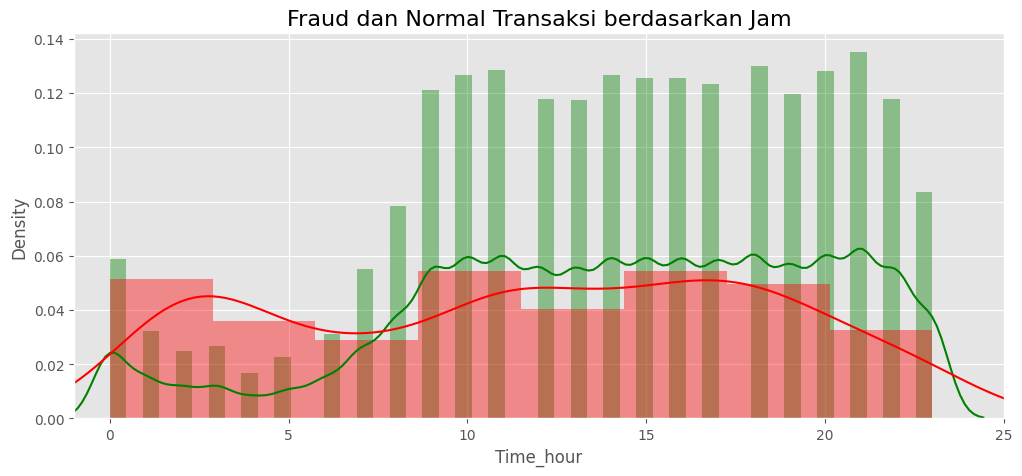

In [10]:
timedelta = pd.to_timedelta(data['Time'], unit='s')
data['Time_hour'] = (timedelta.dt.components.hours).astype(int)

plt.figure(figsize=(12, 5))
sns.distplot(data[data['Class'] == 0]["Time_hour"], color='g')
sns.distplot(data[data['Class'] == 1]["Time_hour"], color='r')
plt.title("Fraud dan Normal Transaksi berdasarkan Jam", fontsize=16)
plt.xlim([-1,25])
plt.show()

In [11]:
# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(data.Time_hour, return_counts=True)

result_df = pd.DataFrame({
    'Time_hour': unique_targets,
    'Count': target_counts
})

# Menampilkan tabel pandas
result_df

,Time_hour,Count
0,0,7695
1,1,4220
2,2,3328
3,3,3492
4,4,2209
5,5,2990
6,6,4101
7,7,7243
8,8,10276
9,9,15838


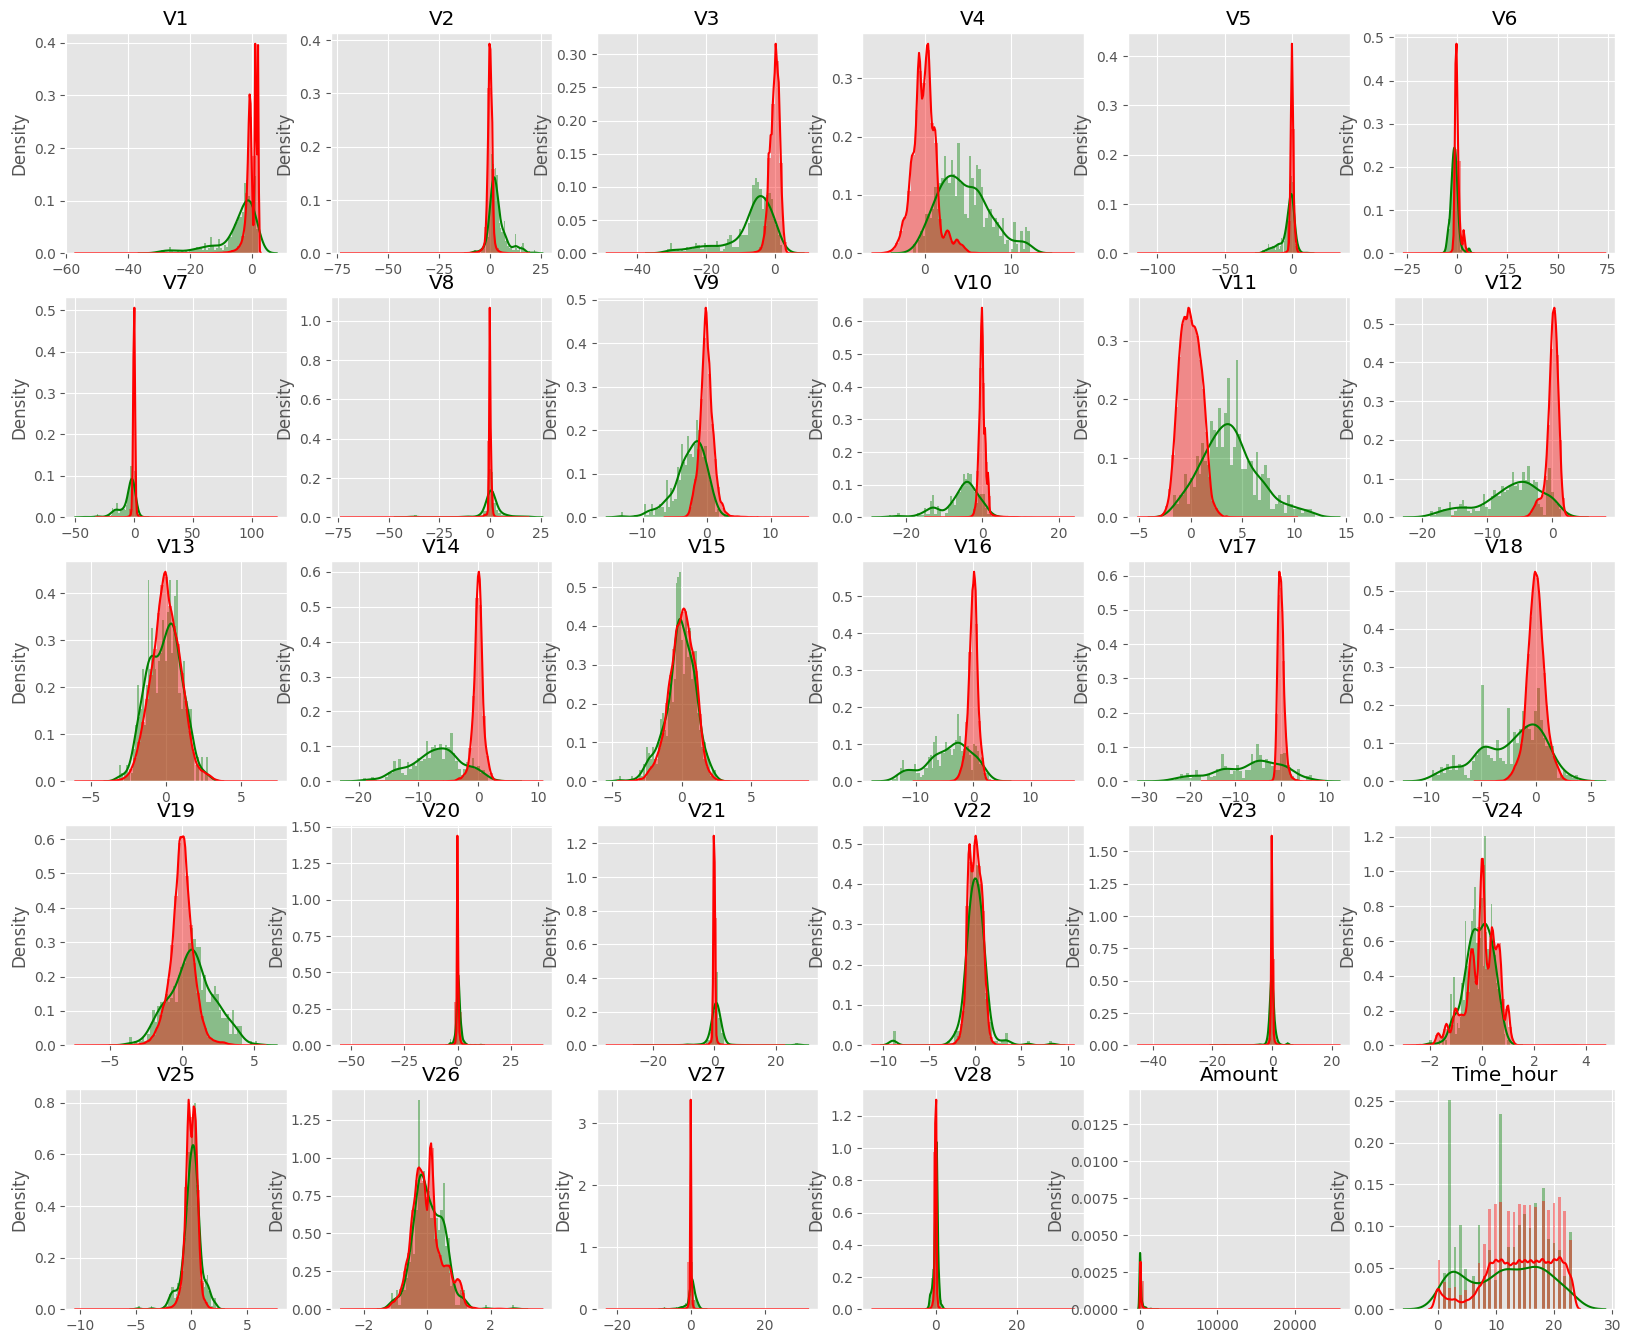

In [12]:
# Distribusi Data
columns = data.drop(['Time','Class'], axis=1).columns
grid = gridspec.GridSpec(6, 6)

plt.figure(figsize=(20,10*2))

for n, col in enumerate(data[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(data[data.Class==1][col], bins = 50, color='g')
    sns.distplot(data[data.Class==0][col], bins = 50, color='r')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')

plt.show()

# Modelling

## Isolation Forest

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
n_outliers = len(data[data['Class']==1])
outlier_fraction = len(data[data['Class']==1])/float(len(data[data['Class']==0]))
iforest = IsolationForest(n_estimators=100, max_samples=len(data.loc[:,data.columns!='Class']),
                      contamination=outlier_fraction, random_state=42, verbose=0)
# Separate features and labels
X = data.drop("Class", axis=1)
y = data["Class"]

# Train and predict with IsolationForest
iforest.fit(X)
y_pred_if = iforest.predict(X)
y_pred_if = np.array([1 if x == -1 else 0 for x in y_pred_if]) # Convert -1 to 1 for frauds

print("IsolationForest:")
print("Accuracy:", accuracy_score(y, y_pred_if))
print("Precision:", precision_score(y, y_pred_if))
print("Recall:", recall_score(y, y_pred_if))
print("F1-score:", f1_score(y, y_pred_if))
print("AUC:", roc_auc_score(y, -iforest.score_samples(X))) # Use negative score samples as anomaly score
print()

IsolationForest:
Accuracy: 0.9977282861727416
Precision: 0.34279918864097364
Recall: 0.3434959349593496
F1-score: 0.3431472081218275
AUC: 0.9510474397957493



## LocatOutlierFactor

In [19]:
# LocalOutlierFactor

from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, classification_report
n_outliers = len(data[data['Class']==1])
outlier_fraction = len(data[data['Class']==1])/float(len(data[data['Class']==0]))
lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', contamination=outlier_fraction)
X = data.drop("Class", axis=1)
y = data["Class"]

# Train and predict with LOF
y_pred_lof = lof.fit_predict(X)
y_pred_lof = np.array([1 if x == -1 else 0 for x in y_pred_lof]) # Convert -1 to 1 for

print("LOF:")
print("Accuracy:", accuracy_score(y, y_pred_lof))
print("Precision:", precision_score(y, y_pred_lof))
print("Recall:", recall_score(y, y_pred_lof))
print("F1-score:", f1_score(y, y_pred_lof))
print("AUC:", roc_auc_score(y, -lof.negative_outlier_factor_)) # Use negative outlier factor as anomaly score
print()

LOF:
Accuracy: 0.9967170750718908
Precision: 0.05070993914807302
Recall: 0.0508130081300813
F1-score: 0.050761421319796954
AUC: 0.7780926278522233



## OneClassSVM

In [21]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, classification_report
outlier_fraction = len(data[data['Class']==1])/float(len(data[data['Class']==0]))
ocsvm = OneClassSVM(kernel="rbf", nu=outlier_fraction)
X = data.drop("Class", axis=1)
y = data["Class"]

# Train and predict with OneClassSVM
ocsvm.fit(X)
y_pred_ocsvm = ocsvm.predict(X)
y_pred_ocsvm = np.array([1 if x == -1 else 0 for x in y_pred_ocsvm]) # Convert -1 to 1 for frauds

print("OneClassSVM:")
print("Accuracy:", accuracy_score(y, y_pred_ocsvm))
print("Precision:", precision_score(y, y_pred_ocsvm))
print("Recall:", recall_score(y, y_pred_ocsvm))
print("F1-score:", f1_score(y, y_pred_ocsvm))
print("AUC:", roc_auc_score(y, -ocsvm.score_samples(X))) # Use negative score samples as anomaly score

OneClassSVM:
Accuracy: 0.9965415175891043
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC: 0.4995452198687789
